# Удержание пользователей

К нам приходит руководитель продукта “Интернет-магазин”, спрашивает про удержание клиентов и повторные покупки.
У него есть опасение, что из-за проблем с доставкой товаров в магазине у нас стали больше оттекать пользователи.
Он просит нас сравнить, на сколько сейчас все хуже, чем в прошлом году? 

Нам необходимо сделать:
- Проверить гипотезу руководителя продукта 
- Дать руководителю продукта инструмент для самостоятельного принятия решений по качеству удержания пользовательской базы

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Удержание-пользователей" data-toc-modified-id="Удержание-пользователей-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Удержание пользователей</a></span><ul class="toc-item"><li><span><a href="#Импорт-необходимых-библиотек" data-toc-modified-id="Импорт-необходимых-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт необходимых библиотек</a></span></li><li><span><a href="#Первичный-осмотр-данных" data-toc-modified-id="Первичный-осмотр-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Первичный осмотр данных</a></span><ul class="toc-item"><li><span><a href="#Customers" data-toc-modified-id="Customers-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Customers</a></span></li><li><span><a href="#Orders" data-toc-modified-id="Orders-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Orders</a></span></li></ul></li><li><span><a href="#Подготовка-к-анализу" data-toc-modified-id="Подготовка-к-анализу-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Подготовка к анализу</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li></ul></div>

## Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Первичный осмотр данных

### Customers

In [2]:
customers = pd.read_csv('/Users/daniilsobolev/Desktop/Аналитика/Метрики/Занятие_1/customers.csv')

In [3]:
customers.sample(5)

,id,name,segment,state,city
764,TH-21115,Thea Hudgings,Corporate,Pennsylvania,Philadelphia
36,JC-16105,Julie Creighton,Corporate,North Carolina,Durham
167,RF-19840,Roy Franzosisch,Consumer,New York,New York City
310,PG-18820,Patrick Gardner,Consumer,California,San Francisco
199,MY-17380,Maribeth Yedwab,Corporate,Colorado,Parker


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       793 non-null    object
 1   name     793 non-null    object
 2   segment  793 non-null    object
 3   state    793 non-null    object
 4   city     793 non-null    object
dtypes: object(5)
memory usage: 31.1+ KB


In [5]:
len(customers['id'].unique())

793

In [6]:
customers['segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

В таблице customers 793 объекта без пропусков.<br>
Присутствуют следующие признаки:
- id -- id покупателя (уникальные)
- name -- имя покупателя
- segment -- тип покупки: Пользовательский, Корпоративный, Домашний офис
- state -- штат, куда отправлялась покупка
- city -- город, в который отправлялась покупка

### Orders

In [7]:
orders = pd.read_csv('/Users/daniilsobolev/Desktop/Аналитика/Метрики/Занятие_1/orders.csv')

In [8]:
orders.sample(5)

,id,order_date,ship_mode,customer_id,sales
2384,144785,2016-04-18,Standard,CS-12490,13.830
1975,117660,2016-12-30,Standard,BM-11785,19.616
4674,156097,2016-09-19,Same Day,EH-14125,703.680
1909,113516,2016-09-08,Second,VM-21685,100.160
2608,158610,2016-09-19,First,CK-12595,69.520


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5009 non-null   int64  
 1   order_date   5009 non-null   object 
 2   ship_mode    5009 non-null   object 
 3   customer_id  5009 non-null   object 
 4   sales        5009 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 195.8+ KB


In [10]:
len(orders['id'].unique())

5009

In [11]:
orders['ship_mode'].unique()

array(['Standard', 'Second', 'First', 'Same Day'], dtype=object)

In [12]:
len(orders['customer_id'].unique())

793

In [13]:
print(f"Разброс дат заказов: {orders['order_date'].min()} -- {orders['order_date'].max()}")

Разброс дат заказов: 2014-01-03 -- 2017-12-30


В таблице orders 5009 объектов без пропусков<br>
Присутствуют следующие признаки:
- id -- id покупки (уникальные)
- order_date -- дата покупки
- ship_mode -- ХЗ
- customer_id -- id покупателя, совершившего данную покупку
- sales -- стоимость покупки

**Вывод:**

- Данные в таблице без пропусков, что хорошо. С первого взгляда все корректные.

- Наш руководитель просит узнать как изменилась ситуация с прошлого (2016) по этот год (2017). Но нам доступна информация о заказах с 2014 по 2017 год, поэтому есть возможность посмотреть, что было и раньше.

## Подготовка к анализу

Для проверки гипотезы нам потребуется id покупателя, id его покупок, сумма и дата каждой покупки.

Тогда, в принципе, нам не нужна таблица сustomers. Но, руководитель к нам пришел с опасениями плохой работы доставки, поэтому далее можно будет провести анализ по штатам/городам. Или же по сегментам.

Извлечем год и месяц в отдельные признаки.

In [14]:
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['year'] = orders['order_date'].dt.year
orders['month'] = orders['order_date'].dt.month

## Анализ

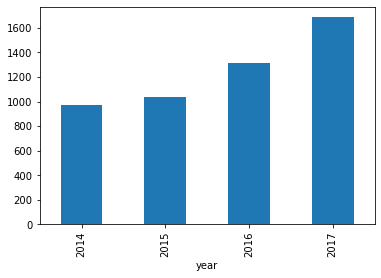

In [15]:
orders.groupby('year').count()['id'].plot(kind='bar')
plt.show()

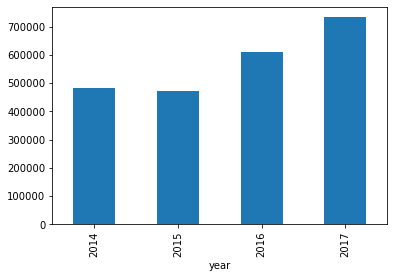

In [16]:
orders.groupby('year').sum()['sales'].plot(kind='bar')
plt.show()

**Вывод:** 

- Можно заметить, что количество пользователей и сумма общих покупок с 2016 по 2017 год выросли. Что хорошо, но пока это не обьясняет, были ли это новые пользователи или вновь пришедшие старые.

Для того, чтобы понять были ли это ушедшие пользователи или же вновь пришедшие, найдем для каждого пользователя дату первой покупки (год и месяц) и добавим её в исходный датасет:

In [17]:
first_orders = orders.groupby('customer_id')['order_date'].min().to_frame()
first_orders['first_order_year'] = first_orders['order_date'].dt.year
first_orders['first_order_month'] = first_orders['order_date'].dt.month
del first_orders['order_date']
del orders['order_date']

In [18]:
orders_merged = orders.merge(first_orders, how='inner', left_on='customer_id', right_index=True)

Посомтрим сколько новых пользователей приходили в каждый год:

In [19]:
orders_merged.groupby('first_order_year').count()['id']

first_order_year
2014    4020
2015     739
2016     231
2017      19
Name: id, dtype: int64

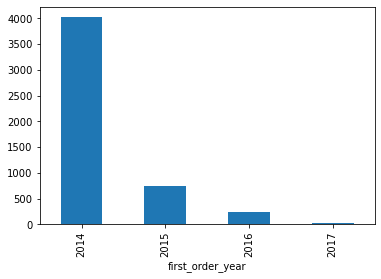

In [20]:
orders_merged.groupby('first_order_year').count()['id'].plot(kind='bar')
plt.show()

**Вывод:** 

- Число новых пользователей с каждым годом сильно убывает.

Далее выведем следующую информацию:

Сгруппируем данные по году первой покупки и для каждой группы выведем сколько покупок и на какую сумму совершали клиенты каждый год. 

In [21]:
cohorts = orders_merged.groupby(['first_order_year', 'year'])['sales'].agg(['sum', 'count'])
cohorts

sum  count
first_order_year year                    
2014             2014  484247.4981    969
                 2015  365144.0128    807
                 2016  454908.4041    996
                 2017  533024.6956   1248
2015             2015  105388.4962    231
                 2016   99493.5739    215
                 2017  131772.4962    293
2016             2016   54803.6200    104
                 2017   60906.2584    127
2017             2017    7511.8050     19

**Вывод:** 

- Из таблицы видно, что рассматривая каждую группу, мы можем сделать вывод, что в 2017 году старые пользователи совершили больше заказов, чем они совершали в годы ранее. Например, пользователи 2014 года ранее делали менее 1000 заказов, а в 2017 году сделали около 1250.

Далее хотелось бы узнать: это большое количество пользователей совершают покупки или же малое количество пользователей совершают много покупок.

In [22]:
def check(data, first_order_year, order_year) -> int:
    used_data = data.copy()
    used_data = used_data[used_data['first_order_year'] == first_order_year] 
    used_data = used_data[used_data['year'] == order_year]
    return len(used_data['customer_id'].unique())

In [23]:
def make_table(data, first_year, last_year):
    result = []
    for i in range(first_year, last_year + 1):
        pre_res = []
        for j in range(first_year, last_year + 1):
            pre_res.append(check(data, i, j))
        result.append(pre_res)
    
    res_data = pd.DataFrame(
        result, 
        list(range(first_year, last_year + 1)), 
        list(range(first_year, last_year + 1))
    )   
    return res_data

In [24]:
make_table(orders_merged, 2014, 2017)

,2014,2015,2016,2017
2014,595,437,485,517
2015,0,136,102,120
2016,0,0,51,45
2017,0,0,0,11


Таблица нам показывает сколько уникальных покупателей, которые начали пользоваться сервисом в таком-то году (индекс), купили товар в году (колонка).

Например: значение 102 показывает нам, что из тех пользователей, кто вошел в сервис в 2015 году, только 102 пользователя сделали покупки и в 2016.

**Вывод:** 

- Из таблицы видно, что большой процент пользователей делает повторные покупки в следующих годах.

## Общий вывод

Нам было доступно два датасета: customers и orders. Данные корректные, пропусков не обнаружено.

Далее для анализа удержания пользователей проходил осмотр датасета orders. Даты покупок были с начала января 2014 по конец декабря 2017, что дало нам возможность рассматривать промежуток длительностью в 4 года.

В ходе исследования были выявлены следующие факты:

- Количество пользователей в каждый год и сумма общих покупок постепенно росли. (только в 2015 году была небольшая просадка по общей сумме покупок)
- Число новых пользователей с каждым годом сильно убывает
- Выявлено, что старые пользователи не уходят, большой процент пользователей остается с компанией
- Число заказов и сумма заказов с каждым годом становиться больше за счет покупок старых пользователей, чем новых.

Заказчик просил узнать стало ли больше оттекать пользователей в 2017 по сравнению с 2016 годом:

- Мы наоборот видим, что пользователи пользующиеся сервисом с 2014/2015 годов приходили в 2017 чаще, чем в 2016. Поэтому гипотезу заказчика можно отвергнуть.

Инструмент для самостоятельного принятия решений по поводу удержания пользовательской базы:

- Немного непонятен этот пункт
- Интсрументом могут быть функции, которые написаны выше, в них можно подставлять текущие значения (датасет, актуальный год) и получать таблицу с новыми значениями, которые впоследствии можно анализировать на предмет удержания.